## Задание

Постройте модель на основе полносвязных слоёв для классификации Fashion MNIST из библиотеки torchvision [(dataset](https://pytorch.org/vision/stable/datasets.html)s).
Получите качество на тестовой выборке не ниже 88%

Инструкция по выполнению задания

1. Скачайте тренировочную и тестовою часть датасета Fashion MNIST
2. Постройте модель, выбрав стартовую архитектуру
3. Обучите модель и сверьте качество на тестовой части с заданным порогом
4. Изменяйте архитектуру модели пока качество на тестовой части не будет выше порога. Вариации архитектуры можно реализовать через изменение количества слоёв, количества нейронов в слоях и использование регуляризации. Можно использовать различные оптимизаторы.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision as tv
import numpy as np
import random
import time

In [2]:
BATCH_SIZE=256

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [5]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 1024),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(1024),
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 10)
)

In [6]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): ReLU()
  (3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Linear(in_features=512, out_features=256, bias=True)
  (8): ReLU()
  (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Linear(in_features=256, out_features=10, bias=True)
)

In [7]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [8]:
def train_model(model, loss, trainer, train, test,  num_epochs = 10):
    
    if torch.cuda.is_available():
        model = model.cuda()
        loss = loss.cuda()
        print("Model will be training on GPU")
    else:
        print("Model will be training on CPU")
        
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train:
            if torch.cuda.is_available():
                X = X.cuda()
                y = y.cuda()
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            if torch.cuda.is_available():
                X = X.cuda()
                y = y.cuda()
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        print("ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
            ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )

In [9]:
examples = enumerate(test)
batch_idx, (example_data, example_targets) = next(examples)

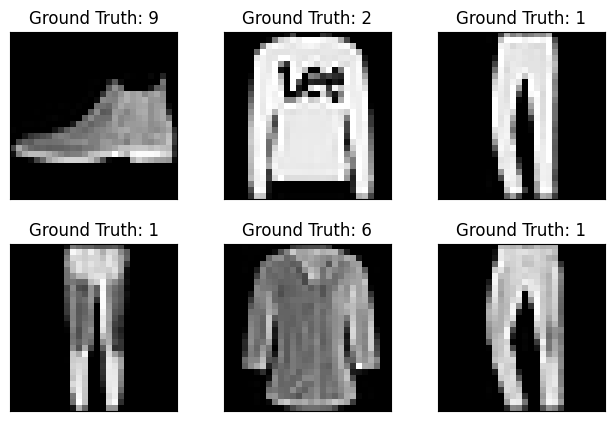

In [10]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [11]:
train_model(model, loss, trainer, train, test, num_epochs=20)

Model will be training on GPU
ep: 0, taked: 13.276, train_loss: 1.0001490283519663, train_acc: 0.7088833333333333, test_loss: 0.6428379759192466, test_acc: 0.8053
ep: 1, taked: 16.138, train_loss: 0.5500190000584785, train_acc: 0.83035, test_loss: 0.5128350526094436, test_acc: 0.8331
ep: 2, taked: 16.431, train_loss: 0.4560234674747954, train_acc: 0.8537333333333333, test_loss: 0.4585466757416725, test_acc: 0.8459
ep: 3, taked: 16.339, train_loss: 0.4061582458780167, train_acc: 0.8675, test_loss: 0.4261684872210026, test_acc: 0.8556
ep: 4, taked: 16.926, train_loss: 0.37241786502777263, train_acc: 0.8769166666666667, test_loss: 0.4040909893810749, test_acc: 0.862
ep: 5, taked: 13.808, train_loss: 0.3469809244287775, train_acc: 0.8842166666666667, test_loss: 0.3880417637526989, test_acc: 0.8665
ep: 6, taked: 13.752, train_loss: 0.32627419436231575, train_acc: 0.8908166666666667, test_loss: 0.3759670853614807, test_acc: 0.8689
ep: 7, taked: 15.957, train_loss: 0.3085679799318314, train_a

In [12]:
with torch.no_grad():
  output = model(example_data.cuda())

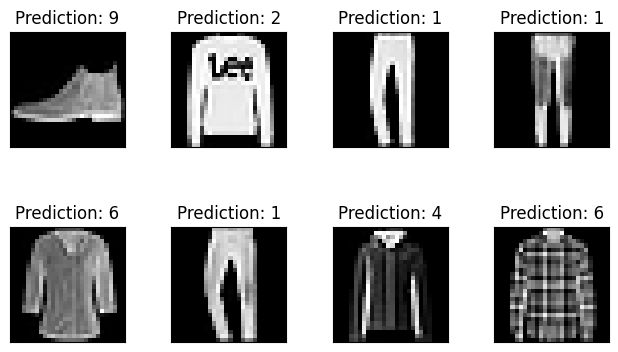

In [13]:
fig = plt.figure()
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])